In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

In [7]:
stock_data = pd.read_csv('../../Data/TSLA.csv', index_col='Date', parse_dates=True)
stock_data = stock_data.iloc[-365:]
stock_data = stock_data.drop(['Adj Close', 'Volume'], axis = 1)
stock_data

,Open,High,Low,Close
Date,,,,
2019-07-11,47.63,48.30,47.16,47.72
2019-07-12,47.95,49.08,47.94,49.02
2019-07-15,49.60,50.88,48.97,50.70
2019-07-16,49.86,50.71,49.59,50.48
2019-07-17,51.13,51.66,50.67,50.97
...,...,...,...,...
2020-12-11,615.01,624.00,596.80,609.99
2020-12-14,619.00,642.75,610.20,639.83
2020-12-15,643.28,646.90,623.80,633.25


### Calculate the ADX
The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations. However, with Python, you can calculate it with one line of code. In this exercise, you will implement your first ADX indicator using daily price data of the Tesla stock.

In [12]:
stock_data['ADX_14'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])
stock_data['ADX_21'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=21)
# Visualize the data
stock_data.tail()


,Open,High,Low,Close,ADX_14,ADX_21
Date,,,,,,
2020-12-11,615.01,624.00,596.8,609.99,30.708111,22.736224
2020-12-14,619.00,642.75,610.2,639.83,30.351997,22.872343
2020-12-15,643.28,646.90,623.8,633.25,30.118955,23.047114
2020-12-16,628.23,632.50,605.0,622.77,29.154702,22.869302
2020-12-17,628.19,658.82,619.5,655.90,28.917346,22.997637


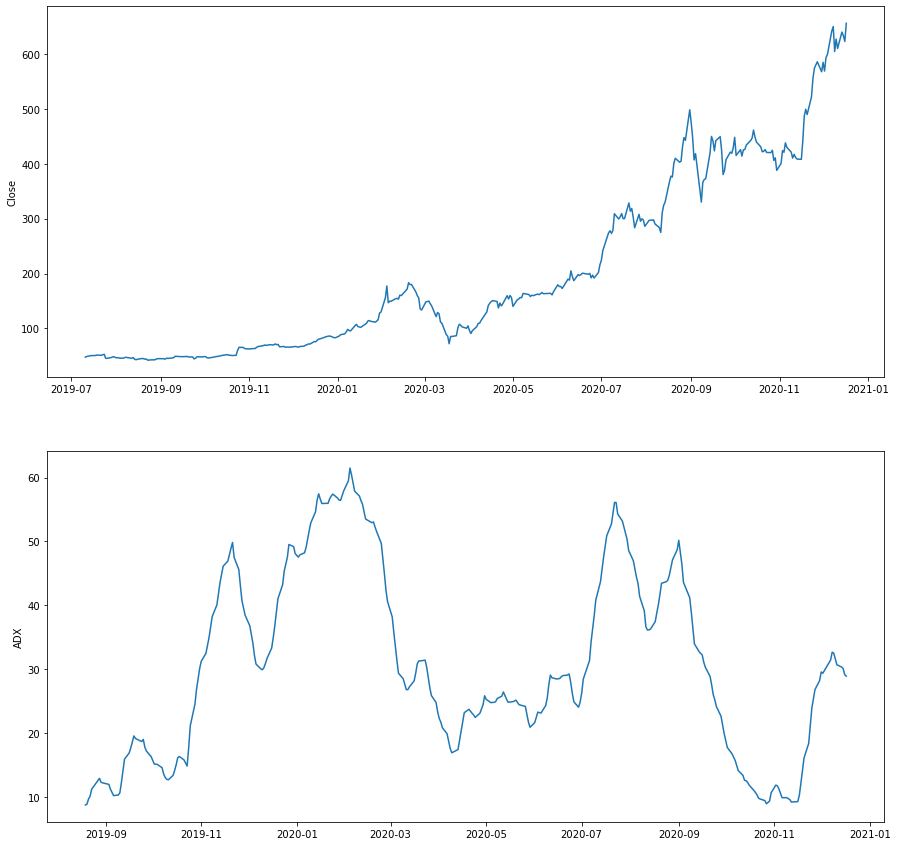

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
ax1.plot(stock_data['Close'])
ax1.set_ylabel('Close')
ax1.title('Closing Price ')


ax2.plot(stock_data['ADX_14'])
ax2.set_ylabel('ADX')
ax2.title('ADX')

plt.show()
